In [10]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from modules.utilityFunctions import plotMomentScaling, fitMoments, plotCorrelationMeanSize, cumulative_data, susmanProcessing
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar
from typing import Union, List, Callable
from tqdm.notebook import tqdm_notebook
from matplotlib.ticker import FormatStrFormatter
from modules.visualizationTS import systemHandling
from modules.simulations import simulation
import matplotlib.image as mpimg
from scipy.stats import gamma


In [11]:
dataPath = Path.cwd().parents[1] / 'data'
proteinHighH = dataPath / 'calibratedModel' / 'highH'
proteinLowH = dataPath / 'calibratedModel' / 'lowH'
bayesianPath = '/Users/tommaso/Desktop/masterThesis/data/bayesianInference/'
susmanBayesian = pd.read_csv(bayesianPath + 'susman18_export_run_635409.csv')


## Comparison Between Calibrated Model

Down below there is a small comparison between the calibrated models. Only the Stawsky data is reported as that is what my group and the master thesis worked on.
We worked only on 1 lineage (lineage $15$) while the csv data has multiple lineages even though 15 is missing.
Results from my group and the master thesis more or less agree, especially on the gamma value and while the csv data suggest we are in the absorbing state (and by a good margin), our results point instead to the active state, $\\gamma \approx 0.9$


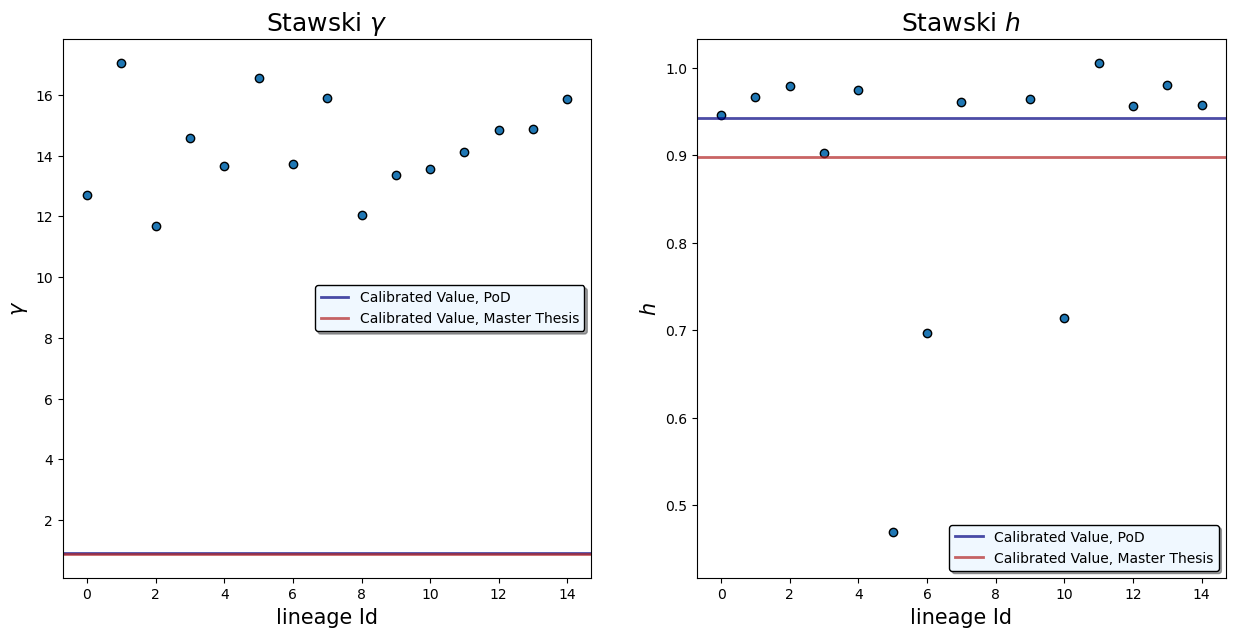

In [23]:
alphaMt = (1.4362**2) / (0.0653**2)
betaMt = alphaMt / 1.4362
PoD = {'gamma': 1.2268 / ((30.4743 - 1) * 0.0458), 'h': 0.5455/0.5787}
MT = {'gamma': 1.2772 / ((alphaMt - 1) / (betaMt)), 'h': 0.5241 / 0.5835}
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax1, ax2 = ax.flatten()
ax1.scatter(range(len(susmanBayesian)), susmanBayesian['w2'] /
            (((susmanBayesian['c'] - 1) / susmanBayesian['d'])), edgecolor='black')
ax1.axhline(PoD['gamma'], color='navy', linewidth=2,
            alpha=0.7, label='Calibrated Value, PoD')
ax1.axhline(MT['gamma'], color='firebrick', linewidth=2,
            alpha=0.7, label='Calibrated Value, Master Thesis')
ax1.set_xlabel('lineage Id', fontsize=15)
ax1.set_ylabel('$\\gamma$', fontsize=15)
ax1.set_title('Stawski $\\gamma$', fontsize=18)

ax2.scatter(range(len(susmanBayesian)),
            susmanBayesian['u'] / susmanBayesian['v'], edgecolor='black')
ax2.axhline(PoD['h'], color='navy', linewidth=2,
            alpha=0.7, label='Calibrated Value, PoD')
ax2.axhline(MT['h'], color='firebrick', linewidth=2,
            alpha=0.7, label='Calibrated Value, Master Thesis')
ax2.set_xlabel('lineage Id', fontsize=15)
ax2.set_ylabel('$h$', fontsize=15)
ax2.set_title('Stawski $h$', fontsize=18)
ax1.legend(facecolor='aliceblue', edgecolor='black',
           shadow=True, loc='center right')
_ = ax2.legend(facecolor='aliceblue', edgecolor='black',
               shadow=True, loc='lower right')

## Simulations

Below are instead some plots and tables summing up simulation results:
The $\\gamma$ value is the one on which both my group and the master thesis results agree on. The $h$ values span the vicinity of the $h$ value of the calibrated models.\\
The power law exponents closely resemble the data values while the mean size at birth differ.\\
Looking at the master thesis, the model is calibrated also on synthetic data yielding the same $\\gamma$ but a lower $h$. Simulating at this new $h$ value we get the right mean size at birth with slightly worse power law exponents.\\
\\
The behaviour of $\\xi$ seems still linear even if it looks noisier than the simulations done closer to the critical point.


## Moment scaling, $h$ around 0.9


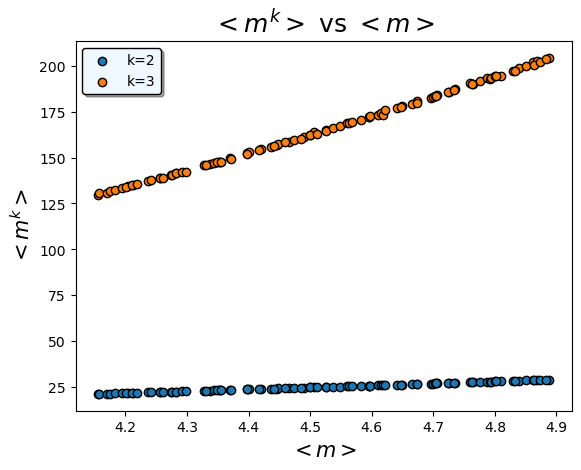

In [31]:
plotMomentScaling(proteinHighH / 'momentScaling')
fitDictionary = fitMoments(proteinHighH / 'momentScaling')
pd.DataFrame(fitDictionary)


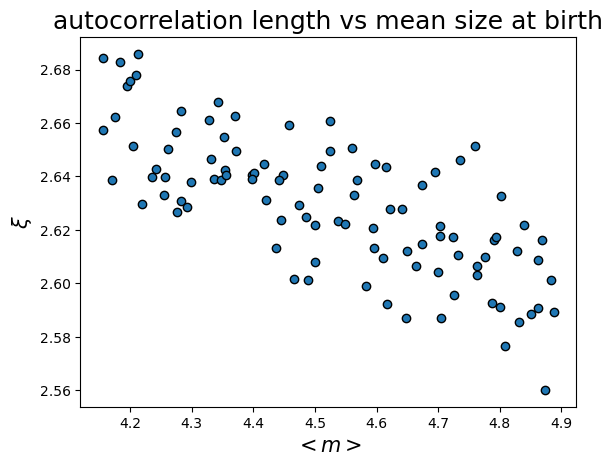

In [32]:
plotCorrelationMeanSize(proteinHighH)


## Moment scaling, $h$ around 0.38


,linear,log
k=2,6.484725,1.853171
k=3,39.950649,2.609280


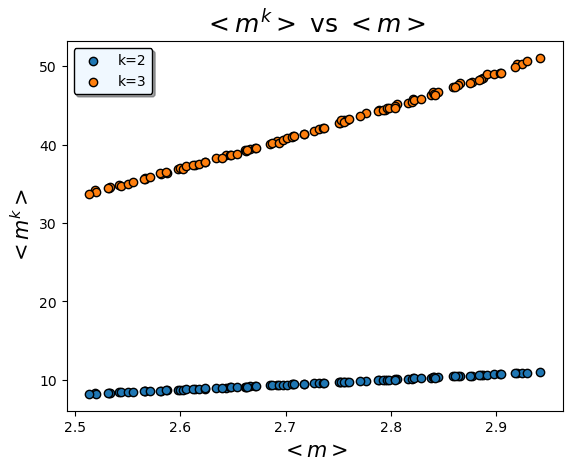

In [34]:
plotMomentScaling(proteinLowH / 'momentScaling')
fitDictionary = fitMoments(proteinLowH / 'momentScaling')
pd.DataFrame(fitDictionary)


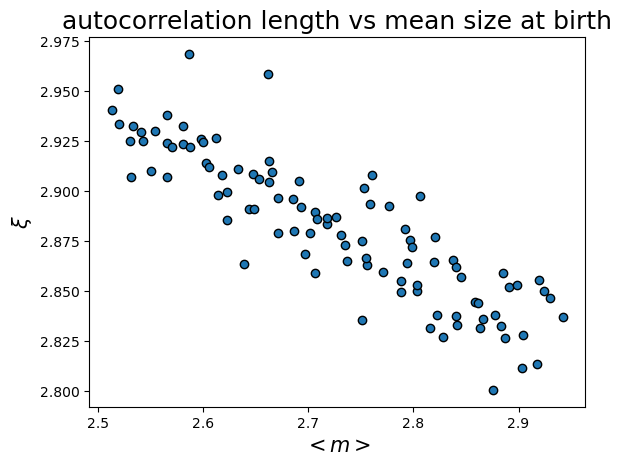

In [35]:
plotCorrelationMeanSize(proteinLowH)


<center>

## Table Summing up Calibration

</center>


<center>

|                                   | **γ** | **h** |
| --------------------------------- | :---: | :---: |
| **Master Thesis, Real Data**      | 0.891 | 0.898 |
| **Master Thesis, Synthetic Data** | 0.891 | 0.388 |
| **PoD, Real Data**                | 0.909 | 0.943 |

</center>


<center>

## Table Summing up Power Law Exponents

</center>


<center>

|              | **Power Law Exponent, k = 2** | **Power Law Exponent, k = 3** |
| ------------ | :---------------------------: | :---------------------------: |
| **Lower H**  |             1.853             |             2.609             |
| **Higher H** |             1.923             |             2.787             |
| **Data**     |             1.936             |             2.755             |

</center>
